## ABIO558 Project (2FFFFFFinal Version)

### Project Goals:
1. Write markdown text describing the question and outlining your plan for analysis
2. Load data and write code
3. Visualization code

### Outline of Analysis Plan

In [1]:
# Research Question: How does EspM regulate whiB6 expression in the M. smegmatis strain MKD8?
# Data we have: RNA-seq data of the WT and espM deletion (KOespM) strains of MKD8
# Project Goal: To identify genes that are expressed differently when EspM is missing
# --> we want to make graphs or tables of significant changes in gene expression

# Plan for Analysis: Analyze MKD8 WT vs espM KO RNASeq data to determine gene expression differences
# --> conditions are WT and KOespM. Looking for significant changes in expression of genes in the whiB6 regulon
# (and/or anywhere else in the genome)

# Outline:

# Step 1: Pull out raw count data of each gene for each of the 4 samples

# Step 2: Normalize raw count data (each gene) to a factor that's the sum of the read counts per sample / the average of the 4 sums
# --> this factor is what every gene in each sample is divided by

# Step 3: Make Scatterplots

# Step 4: Make MA plots
# --> need log2 expression for M and ratio of KO/WT for A

# Step 1: Pull out the correct data columns

1) Import libraries
2) Find file path - check that it's correct
3) Load data with pandas
4) Pull out raw count columns for each of the 4 samples
5) Rename columns - Biorep 1 = OLD, Biorep 2 = NEW

In [2]:
# 1. Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scanpy
import seaborn as sns
import skimage

In [3]:
# 2. Find file path

data_directory = 'C:/Users/denis/Downloads/'
filepath_mkd8 = os.path.join(data_directory, 'MKD8_KO_Rockhopper_data.csv')
os.path.exists(filepath_mkd8)

True

In [4]:
# 3. Load data with pandas

reads_df = pd.read_csv(filepath_mkd8, index_col=0)
reads_df.head()

,Translation Start,Translation Stop,Transcription Stop,Strand,Name,Synonym,Product,Raw Counts MKD8-oldmycospike,Normalized Counts MKD8-oldmycospike,RPKM MKD8-oldmycospike,...,pValue MKD8-oldmycospike vs KOespM-OLDmycospike,qValue MKD8-oldmycospike vs KOespM-OLDmycospike,pValue MKD8-oldmycospike vs KOespM-NEWmycospike,qValue MKD8-oldmycospike vs KOespM-NEWmycospike,pValue MKD8-NEWmycospike vs KOespM-OLDmycospike,qValue MKD8-NEWmycospike vs KOespM-OLDmycospike,pValue MKD8-NEWmycospike vs KOespM-NEWmycospike,qValue MKD8-NEWmycospike vs KOespM-NEWmycospike,pValue KOespM-OLDmycospike vs KOespM-NEWmycospike,qValue KOespM-OLDmycospike vs KOespM-NEWmycospike
Transcription Start,,,,,,,,,,,,,,,,,,,,,
NaN,1.0,1515.0,NaN,+,dnaA,MSMEI_0001,chromosomal replication initiator protein dnaA,4093.0,466488.0,232.0,...,0.047732,1.0,0.232398,1.0,0.048318,1.0,0.069294,1.0,7.290000e-21,4.220000e-19
NaN,1454.0,2071.0,2071.0,+,-,MSMEI_0002,hypothetical protein,1969.0,224415.0,274.0,...,0.658421,1.0,0.715949,1.0,0.665426,1.0,0.722310,1.0,1.092048e-02,5.016868e-02
2072.0,2109.0,3302.0,3302.0,+,dnaN,MSMEI_0003,DNA polymerase III subunit beta,13295.0,1515174.0,959.0,...,0.169175,1.0,0.213948,1.0,0.879587,1.0,0.287741,1.0,4.100000e-13,2.510000e-12
3303.0,3331.0,4224.0,4224.0,+,-,MSMEI_0004,6-phosphogluconate dehydrogenase,8056.0,918148.0,776.0,...,0.959884,1.0,0.349188,1.0,0.585358,1.0,0.751938,1.0,1.660000e-11,9.370000e-11
4225.0,4234.0,5388.0,NaN,+,recF,MSMEI_0005,DNA replication and repair protein RecF,3001.0,342014.0,223.0,...,0.428367,1.0,0.319915,1.0,0.677851,1.0,0.699315,1.0,2.010000e-17,2.650000e-16


In [5]:
# 4. Extract the raw count columns

raw_counts = pd.read_csv(filepath_mkd8, usecols=['Raw Counts MKD8-oldmycospike', 'Raw Counts MKD8-NEWmycospike', 'Raw Counts KOespM-OLDmycospike', 'Raw Counts KOespM-NEWmycospike'])
print(raw_counts)

      Raw Counts MKD8-oldmycospike  Raw Counts MKD8-NEWmycospike  \
0                           4093.0                        3700.0   
1                           1969.0                        1744.0   
2                          13295.0                        9364.0   
3                           8056.0                        5592.0   
4                           3001.0                        1928.0   
...                            ...                           ...   
6886                          75.0                          62.0   
6887                        4085.0                        3206.0   
6888                        9695.0                        8156.0   
6889                        7317.0                        6190.0   
6890                        2700.0                        2637.0   

      Raw Counts KOespM-OLDmycospike  Raw Counts KOespM-NEWmycospike  
0                             1442.0                          1604.0  
1                              749.0     

In [6]:
# 5. Rename the columns

raw_counts_renamed = raw_counts.rename(columns={'Raw Counts MKD8-oldmycospike': 'RC MKD8 WT1', 'Raw Counts MKD8-NEWmycospike': 'RC MKD8 WT2', 'Raw Counts KOespM-OLDmycospike': 'RC KOespM 1', 'Raw Counts KOespM-NEWmycospike': 'RC KOespM 2'})
raw_counts_renamed

,RC MKD8 WT1,RC MKD8 WT2,RC KOespM 1,RC KOespM 2
0,4093.0,3700.0,1442.0,1604.0
1,1969.0,1744.0,749.0,650.0
2,13295.0,9364.0,4701.0,4894.0
3,8056.0,5592.0,4026.0,3617.0
4,3001.0,1928.0,1513.0,1542.0
...,...,...,...,...
6886,75.0,62.0,27.0,30.0
6887,4085.0,3206.0,1239.0,1379.0
6888,9695.0,8156.0,3126.0,2869.0
6889,7317.0,6190.0,2875.0,3357.0


# Step 2: Normalize the data

1) Sum the raw counts of each sample
2) Average  of sums of the raw counts
3) Divide the column sums by the average - this is the correction factor
4) Divide each gene by the correction factor

In [7]:
# 1. Sum the raw counts of each sample

avg2 = raw_counts_renamed.sum(axis=0)
avg2

RC MKD8 WT1    8802709.0
RC MKD8 WT2    7064986.0
RC KOespM 1    7831718.0
RC KOespM 2    7363200.0
dtype: float64

In [8]:
# 2. Get average  of the sums of the raw counts

norm_avg = avg2[['RC MKD8 WT1', 'RC MKD8 WT2', 'RC KOespM 1', 'RC KOespM 2']].mean()
norm_avg

np.float64(7765653.25)

In [9]:
# 3. Divide the column sums by the average - this is the correction factor to normalize your genes to the average of each column/sample

correction_factor = avg2.div(norm_avg, axis=0)
correction_factor

RC MKD8 WT1    1.133544
RC MKD8 WT2    0.909774
RC KOespM 1    1.008507
RC KOespM 2    0.948175
dtype: float64

In [10]:
# 4. Divide each gene by the correction factor - these are your normalizes values

normalized_counts_corrected = raw_counts_renamed.div(correction_factor, axis=1)
normalized_counts_corrected

,RC MKD8 WT1,RC MKD8 WT2,RC KOespM 1,RC KOespM 2
0,3610.799670,4066.946067,1429.835955,1691.670444
1,1737.030186,1916.960524,742.681782,685.527300
2,11728.703057,10292.671073,4661.344539,5161.493237
3,7106.914767,6146.584434,3992.038526,3814.695758
4,2647.449257,2119.208653,1500.237032,1626.281686
...,...,...,...,...
6886,66.164177,68.148826,26.772240,31.639722
6887,3603.742158,3523.953808,1228.548369,1454.372533
6888,8552.822575,8964.868141,3099.630510,3025.812035
6889,6454.977079,6803.890852,2850.747830,3540.484838


# Step 3: Graphs!

1) Generate scatterplot
2) Generate MA plot

# Scatterplot

1. Average the normalized counts for each gene across the 2 Bioreps
2. Generate Scatter plot of WT vs. KO averaged normalized raw counts for the two conditions
3. Insert line of unity (to see where points deviate)

In [11]:
# 1. Average the normalized counts for each gene across the 2 Bioreps

# WT Normalized Average Counts
normalized_counts_corrected['Avg_Norm_WT'] = normalized_counts_corrected[['RC MKD8 WT1', 'RC MKD8 WT2']].mean(axis=1)
print(normalized_counts_corrected['Avg_Norm_WT'])

# KO Normalized Average Counts
normalized_counts_corrected['Avg_Norm_KOespM'] = normalized_counts_corrected[['RC KOespM 1', 'RC KOespM 2']].mean(axis=1)
print(normalized_counts_corrected['Avg_Norm_KOespM'])

0        3838.872868
1        1826.995355
2       11010.687065
3        6626.749601
4        2383.328955
            ...     
6886       67.156501
6887     3563.847983
6888     8758.845358
6889     6629.433966
6890     2640.216907
Name: Avg_Norm_WT, Length: 6891, dtype: float64
0       1560.753200
1        714.104541
2       4911.418888
3       3903.367142
4       1563.259359
           ...     
6886      29.205981
6887    1341.460451
6888    3062.721272
6889    3195.616334
6890    1403.428567
Name: Avg_Norm_KOespM, Length: 6891, dtype: float64


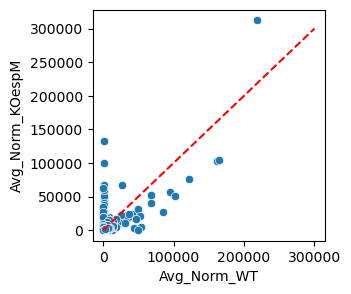

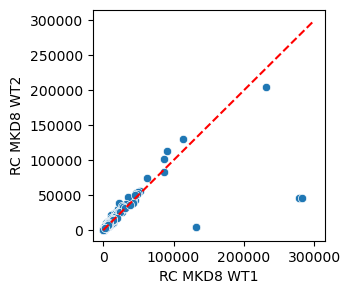

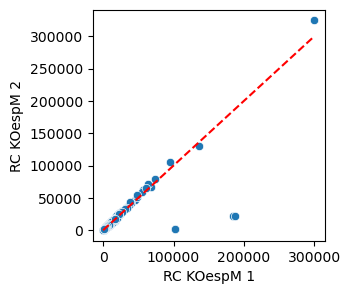

In [12]:
# 2. Generate a scatterplot of WT (x-axis) vs. KO (y-axis)

fh, ax = plt.subplots(1,1, figsize=(3,3))
sns.scatterplot(data=normalized_counts_corrected,
                x=normalized_counts_corrected['Avg_Norm_WT'],
                y=normalized_counts_corrected['Avg_Norm_KOespM'],
                ax=ax)

# 3. Insert the line of unity (y=x) to see where points (gene raw counts) deviate

min_val = 0
max_val = 300000
unity_line_values = np.linspace(min_val, max_val, 250) # Create values for the line
plt.plot(unity_line_values, unity_line_values, color='red', linestyle='--', label='Line of Unity (y=x)')


# Plot WT1 vs WT2 - test to see how well the 2 bioreps align
fh, ax = plt.subplots(1,1, figsize=(3,3))
sns.scatterplot(data=normalized_counts_corrected,
                x='RC MKD8 WT1',
                y='RC MKD8 WT2',
                ax=ax)
# Plot the line of unity (y=x)
min_val = 0
max_val = 300000
unity_line_values = np.linspace(min_val, max_val, 250) # Create values for the line
plt.plot(unity_line_values, unity_line_values, color='red', linestyle='--', label='Line of Unity (y=x)')


# Plot KO1 vs KO2 - test to see how well the 2 bioreps align
fh, ax = plt.subplots(1,1, figsize=(3,3))
sns.scatterplot(data=normalized_counts_corrected,
                x='RC KOespM 1',
                y='RC KOespM 2',
                ax=ax)
# Plot the line of unity (y=x)
min_val = 0
max_val = 300000
unity_line_values = np.linspace(min_val, max_val, 250) # Create values for the line
plt.plot(unity_line_values, unity_line_values, color='red', linestyle='--', label='Line of Unity (y=x)')

In [13]:
# Note:the dots on the left side (KOs on y-axis) are the upregulated genes

# MA Plot

1) Calculate M --> log2 fold change of the "normalized_counts_log2" (represents the difference in expression between two samples)
2) Calculate A --> average intensity (mean expression) of the two samples
3) Create MA plot

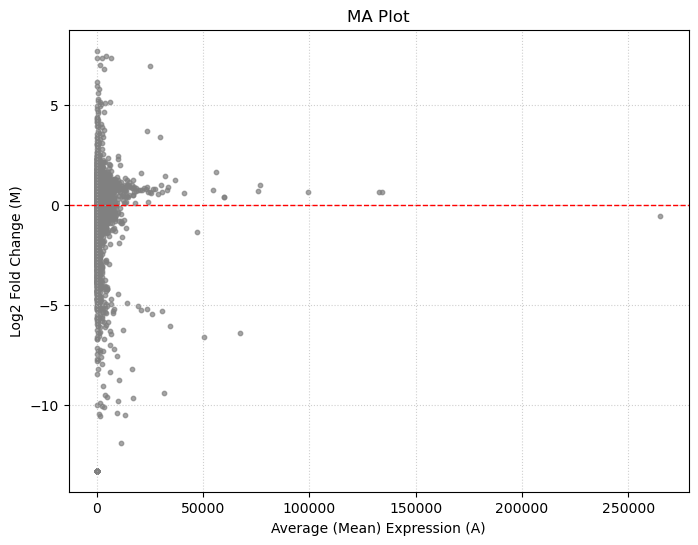

In [14]:
# 1. Calculate M --> "+0.0001" added to account for 0s
M = np.log2(normalized_counts_corrected['Avg_Norm_WT'] / normalized_counts_corrected['Avg_Norm_KOespM'] + 0.0001)

# 2. Calculate A
A = ((normalized_counts_corrected['Avg_Norm_WT']) + (normalized_counts_corrected['Avg_Norm_KOespM'])) / 2

# 3. Create the MA plot
plt.figure(figsize=(8, 6))
plt.scatter(A, M, s=10, alpha=0.7, color='gray')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1) # Add a horizontal line at M=0
plt.xlabel("Average (Mean) Expression (A)")
plt.ylabel("Log2 Fold Change (M)")
plt.title("MA Plot")
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

# Note: Genes below the axis line are down regulated, above the line are upregulated